findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
findfont: Font family 'Txt' not found.
C:\Users\Yamanaka\AppData\Local\Temp\ipykernel_17480\954364378.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


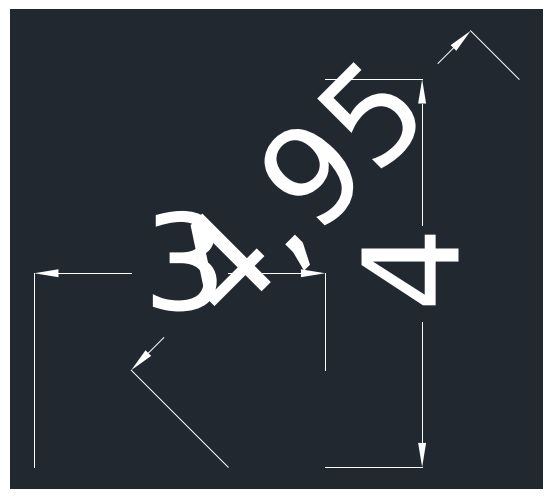

In [5]:
import matplotlib.pyplot as plt
import ezdxf
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

doc = ezdxf.new('R2010')
#モデルスペースを変数に定義する
msp = doc.modelspace() 

dim1 = msp.add_linear_dim(
    base=(1, 2), #寸法線の位置
    p1=(0, 0), #1点目
    p2=(3, 1), #2点目
    angle=0, #角度
    dimstyle="EZDXF", #寸法線のスタイル
).render()

dim2 = msp.add_linear_dim(
    base=(4, 4), 
    p1=(3, 0), 
    p2=(3, 4),  
    angle=90,
    dimstyle="EZDXF", 
).render()

dim3 = msp.add_linear_dim(
    base=(6, 6),  
    p1=(2, 0),  
    p2=(5, 4),  
    angle=45,
    dimstyle="EZDXF",  
).render()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)
Frontend(ctx, out).draw_layout(msp, finalize=True)
fig.show()

In [7]:
import ezdxf
from ezdxf.addons.drawing import matplotlib
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend
import matplotlib.pyplot as plt

doc = ezdxf.new("R2000", setup=True, units = 4)
msp = doc.modelspace()

#構造物の定義
traf_150 ={'name':"150",'A':210,'H':185,'a':150,'h':150,'b':140,'c':35,'d':30,'e':35,'g':160,'r':30}
traf_180 ={'name':"180",'A':250,'H':220,'a':180,'h':180,'b':170,'c':40,'d':35,'e':40,'g':190,'r':50}
traf_240 ={'name':"240",'A':330,'H':290,'a':240,'h':240,'b':220,'c':50,'d':45,'e':50,'g':240,'r':50}
traf_300A ={'name':"300A",'A':400,'H':300,'a':300,'h':240,'b':260,'c':60,'d':50,'e':60,'g':300,'r':50}
traf_300B ={'name':"300B",'A':400,'H':360,'a':300,'h':300,'b':260,'c':60,'d':50,'e':60,'g':300,'r':50}
traf_300C ={'name':"300C",'A':400,'H':425,'a':300,'h':360,'b':260,'c':65,'d':50,'e':60,'g':300,'r':50}
traf_360A ={'name':"360A",'A':460,'H':365,'a':360,'h':300,'b':310,'c':65,'d':50,'e':65,'g':360,'r':50}
traf_360B ={'name':"360B",'A':460,'H':360,'a':360,'h':360,'b':310,'c':65,'d':50,'e':65,'g':360,'r':50}
traf_400A ={'name':"400A",'A':500,'H':420,'a':400,'h':350,'b':350,'c':70,'d':50,'e':70,'g':400,'r':70}
traf_400B ={'name':"400B",'A':510,'H':470,'a':400,'h':400,'b':350,'c':70,'d':55,'e':70,'g':400,'r':70}
traf_450 ={'name':"450",'A':560,'H':520,'a':450,'h':450,'b':400,'c':70,'d':55,'e':70,'g':430,'r':70}
traf_500 ={'name':"500",'A':630,'H':575,'a':500,'h':500,'b':440,'c':75,'d':65,'e':80,'g':500,'r':70}
traf_600 ={'name':"600",'A':740,'H':680,'a':600,'h':600,'b':540,'c':80,'d':70,'e':80,'g':600,'r':70}
#リストに格納
trafs = [traf_150, traf_180, traf_240, traf_300A,
         traf_300B, traf_300C, traf_360A, traf_360B,
         traf_400A, traf_400B, traf_450, traf_500, traf_600]

#レイヤーの設定
layers = ["structure", "dimension", "text", "frame"] #構造物 寸法 文字列 図枠
for layer in layers:
  doc.layers.add(name=layer)#特に属性は指定しない 

#リスト・辞書の定義
#文字の配置（アレンジメント）
alignments_dic = {1:'BOTTOM_LEFT',2:'BOTTOM_CENTER',3:'BOTTOM_RIGHT',4:'MIDDLE_LEFT',5:'MIDDLE_CENTER',6:'MIDDLE_RIGHT',7:'TOP_LEFT',8:'TOP_CENTER', 9:'TOP_RIGHT',10:'LEFT', 11:'CENTER', 12:'RIGHT'}
#ハッチングパターン
patterns =['ANSI31', 'ANSI32', 'ANSI33', 'ANSI34', 'ANSI35', 'ANSI36', 'ANSI37', 'ANSI38', 'ACAD_ISO02W100',
 'ACAD_ISO03W100', 'ACAD_ISO04W100', 'ACAD_ISO05W100', 'ACAD_ISO06W100', 'ACAD_ISO07W100', 'ACAD_ISO08W100',
 'ACAD_ISO09W100', 'ACAD_ISO10W100', 'ACAD_ISO11W100', 'ACAD_ISO12W100', 'ACAD_ISO13W100', 'ACAD_ISO14W100',
 'ACAD_ISO15W100', 'ANGLE', 'AR-B816', 'AR-B816C', 'AR-B88', 'AR-BRELM', 'AR-BRSTD', 'AR-CONC', 'AR-HBONE',
 'AR-PARQ1', 'AR-RROOF', 'AR-RSHKE', 'AR-SAND', 'BOX', 'BRASS', 'BRICK', 'BRSTONE', 'CLAY', 'CORK', 'CROSS',
 'DASH', 'DOLMIT', 'DOTS', 'EARTH', 'ESCHER', 'FLEX', 'GOST_GLASS', 'GOST_WOOD', 'GOST_GROUND', 'GRASS',
 'GRATE', 'GRAVEL', 'HEX', 'HONEY', 'HOUND', 'INSUL', 'LINE', 'MUDST', 'NET', 'NET3', 'PLAST', 'PTAST1',
 'SACNCR', 'SRUARE', 'STARS', 'STEEL', 'SWAMP', 'TRANS', 'TRIANG', 'ZIGZAG']

#トラフの数だけforループを回す
for i, traf in enumerate(trafs):
  x = 1000 * (i // 3)+400 #各要素の基本座標
  y = 3000 - (i%3 * 1000) #各要素の基本座標

#要素を描画する
#構造物各点の定義
  A_point = (x, traf['H']+y)
  B_point = (traf['d']+x, A_point[1])
  C_center = (traf['e']+traf['r']+x,traf['c']+traf['r']+y)

  D_point = (traf['A']+x,A_point[1])
  E_point = (traf['A']-traf['d']+x,A_point[1])
  F_center = (traf['A']-traf['e']-traf['r']+x,C_center[1])

  G_point = ((traf['A']-traf['g'])/2+x,y)
  H_point = (G_point[0]+traf['g'],y)

  I_point = (x,(traf['A']-traf['g'])/2+y)
  J_point = (traf['A']+x,I_point[1])

#弧の描画
  arc_C = msp.add_arc(center=C_center, radius=traf['r'], start_angle=180, end_angle=270, dxfattribs={'layer':'structure'})
  arc_F = msp.add_arc(center=F_center, radius=traf['r'], start_angle=270, end_angle=360, dxfattribs={'layer':'structure'})

#線の描画
  def line_add(p1, p2):#線描画の数式
    new_line = msp.add_line(p1, p2, dxfattribs={'layer':'structure'})
    return new_line

  line_AB = line_add(A_point, B_point)
  line_BC = line_add(B_point, arc_C.start_point)
  line_DE = line_add(E_point,D_point)
  line_EF = line_add(E_point, arc_F.end_point)
  line_CF = line_add(arc_C.end_point, arc_F.start_point)
  line_GH = line_add(G_point, H_point)
  line_GI = line_add(I_point, G_point)
  line_AI = line_add(I_point, A_point)
  line_HJ = line_add(H_point, J_point)
  line_DJ = line_add(J_point, D_point)

#寸法を描画する
#線寸法のoverrideを定義（直線用）
  override={"dimtxsty": "Standard", "dimtxt": 30, "dimclrt": 0, "dimdle": 0.25, "dimtad": 1, "dimltex1": "DASHED2", "dimltex2": "DASHED2", "dimaunit":0, "dimltype": "Continue", "dimlwd": 35,"dimexo": 2,}
#dimstyleの設定（半径・角度用）
  doc.dimstyles.add("my_radiusdim", dxfattribs={"dimtxt":20, "dimtad":1, "dimtmove":2, "dimatfit":1, "dimfxl":10})
  doc.dimstyles.add("my_angledim", dxfattribs={"dimtxt":30, "dimtmove":2, "dimatfit":0, "dimfxl":10})
#注意ポイント dimstyleの中でしかフォントサイズは指定できないようです。

#寸法作成用関数を定義
  def aligned_dim(p1, p2, dis): #aligned直線寸法の関数
    msp.add_aligned_dim(p1=p1, p2=p2, distance=dis, dimstyle="Standard",override=override, dxfattribs={'layer':'dimension'}).render()

  def liner_dim(base, p1, p2, ang): #Liner直線寸法の関数
    msp.add_linear_dim(base=base, p1=p1, p2=p2, angle=ang, dimstyle="Standard", override=override, dxfattribs={'layer':'dimension'}).render()

  def diameter_dim(center, radius, angle):
    msp.add_diameter_dim(center=center, radius=radius, angle=angle, dimstyle="my_radiusdim", dxfattribs={'layer':'dimension'}).render()

#aligned直線寸法の定義
  dim_AB = [line_AB.dxf.start,line_AB.dxf.end,50]
  dim_DE = [line_DE.dxf.start,line_DE.dxf.end,50]
  dim_a  = [line_AB.dxf.end, line_DE.dxf.start,50]
  dim_A  = [line_AB.dxf.start, line_DE.dxf.end,100]
  dim_GH  = [line_GH.dxf.start, line_GH.dxf.end, -50]
  
# b_point1 = [traf['e']+x,traf['c']+y]
# b_point2 = [b_point1[0]+traf['b'],b_point1[1]]

  dim_list =[dim_AB, dim_DE, dim_a, dim_A, dim_GH]#リストに格納
  for p1,p2,dis, in dim_list: #forループで関数を連続起動
    aligned_dim(p1,p2,dis)
  
#liner直線寸法の定義
  dim_H =[(4-100+x,+y), (0+x,0+y), line_AI.dxf.end, 90]
  dim_h1 =[(4-50+x,+y), (0+x,traf['e']+y), line_AI.dxf.end, 90]
  dim_c1 =[(4-50+x,+y), (0+x,0+y), (0+x,traf['e']+y), 90]

  dim_list =[dim_H, dim_h1, dim_c1]#リストに格納
  for base, p1, p2, ang in dim_list:#forループで関数を連続起動
    liner_dim(base, p1, p2, ang)

#半径の寸法
  dimarc_C=[arc_C.dxf.center, arc_C.dxf.radius, 45]
  dimarc_F=[arc_F.dxf.center, arc_F.dxf.radius, 135]

  dimlist =[dimarc_C, dimarc_F]#リストに格納
  for center, radius, angle in dimlist:#forループで関数を連続起動
    diameter_dim(center, radius, angle)

#角度の寸法
  msp.add_angular_dim_2l(base=(H_point[0]+100, H_point[1]+30), line1=(H_point, (H_point[0]+10,0+y)), line2=(H_point, J_point), dimstyle="my_angledim", dxfattribs={'layer':'dimension'}).render()
#注意ポイント baseの位置によって弦の計測される位置が変わります。とても大変です(;'∀')

#文字列の配置
  msp.add_text(('JIS A 5372 '+traf['name']),  #文字列
    dxfattribs={'style': 'OpenSansCondensed-Bold', #フォント
    'height':30, #文字高
    'width':1, #文字幅　割合で書く
    'rotation':0, #角度
    'oblique':15, #傾斜 ✖matplotlib
    'color':4, #色
    'layer':'text'}
    ).set_placement((traf['A']/2+x, traf['H']+200+y), #配置位置
    align=alignments_dic[2]) #文字揃え

#ハッチングを作成します
#注意ポイント円弧の操作性のためエッジパスを採用します
  hatch = msp.add_hatch()
  edge_path = hatch.paths.add_edge_path()

  def hatch_line_append(p1, p2):
    edge_path.add_line(p1 ,p2)

  def hatch_arc_append(arc):
    edge_path.add_arc(arc.dxf.center, arc.dxf.radius, start_angle=arc.dxf.start_angle, end_angle=arc.dxf.end_angle, ccw=False)

  hatch_line_append(A_point, B_point)
  hatch_line_append(B_point, arc_C.start_point)
  hatch_arc_append(arc_C)
  hatch_line_append(arc_C.end_point, arc_F.start_point)
  hatch_arc_append(arc_F)
  hatch_line_append(E_point, arc_F.end_point)
  hatch_line_append(E_point,D_point)
  hatch_line_append(J_point, D_point)
  hatch_line_append(H_point, J_point)
  hatch_line_append(G_point, H_point)
  hatch_line_append(I_point, G_point)
  hatch_line_append(I_point, A_point)

  hatch.set_pattern_fill(patterns[i], scale=0.5, color=i)

#最後に図枠の作成
plpoints=[(10, 10),(10,4180),(5920,4180),(5920,10)]
msp.add_lwpolyline(plpoints, format="xy", close=True, #closeは連続線を閉じるかT/F
dxfattribs={'layer':'frame', #レイヤー
'color': 0, #色
'linetype':"Continuous", 
'const_width':5 
})

doc.saveas('practice1.dxf') #dxfに保存する

fig = plt.figure()
ax = fig.add_axes([0,0,20,20])
ctx = RenderContext(doc)
out = MatplotlibBackend(ax)
Frontend(ctx, out).draw_layout(msp, finalize=True)
fig.show()

AssertionError: 